## Redes Neuronales con Más Neuronas Ocultas


<h2>Objetivo</h2><ul><li>Cómo crear una Red Neuronal compleja en PyTorch</li></ul>


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

Define las funciones de graficado.


In [2]:
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [3]:
def PlotStuff(X,Y,model=None,leg=False):

    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

## Obtener nuestros datos


Define la clase para obtener nuestro conjunto de datos.


In [5]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)

        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):

        return self.x[index],self.y[index]
    def __len__(self):
        return self.len



## Define la Red Neuronal, el Optimizador y entrena el modelo


Define la clase para crear nuestro modelo.


In [6]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)


    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))
        x=torch.sigmoid(self.linear2(x))
        return x

Crea la función para entrenar nuestro modelo, la cual acumula la pérdida en cada iteración para obtener el costo.


In [7]:
 def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]

    for epoch in range(epochs):
        total=0

        for x,y in train_loader:
            optimizer.zero_grad()

            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
            total+=loss.item()

        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)

        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [8]:
data_set=Data()

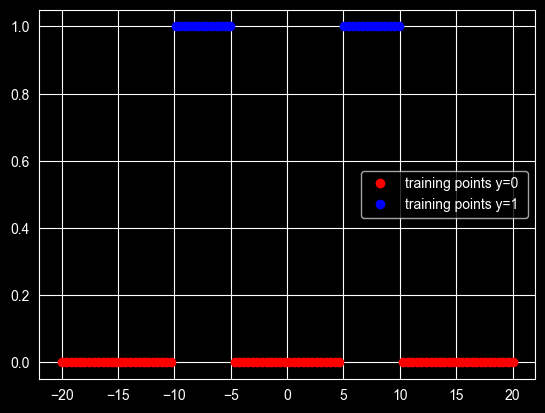

In [9]:
PlotStuff(data_set.x,data_set.y,leg=False)

Crea nuestro modelo con 9
neuronas en la capa oculta. Y luego crea una función de pérdida BCE y un optimizador Adam.


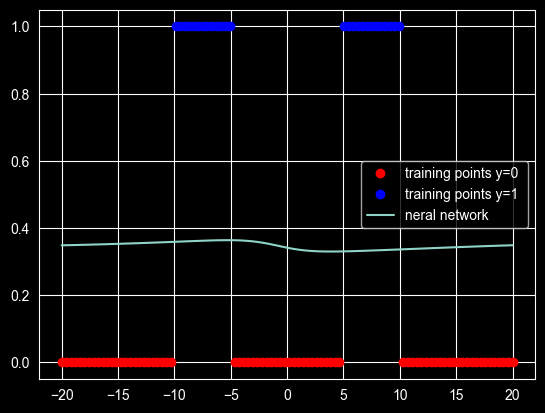

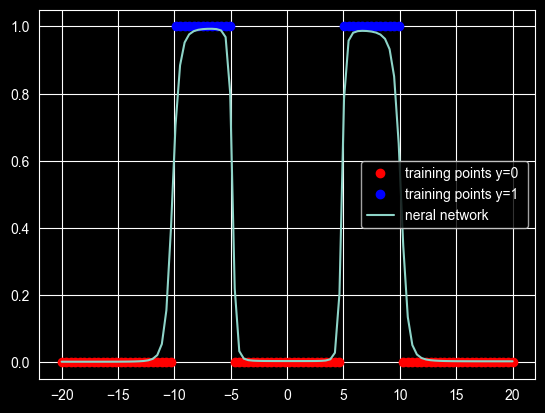

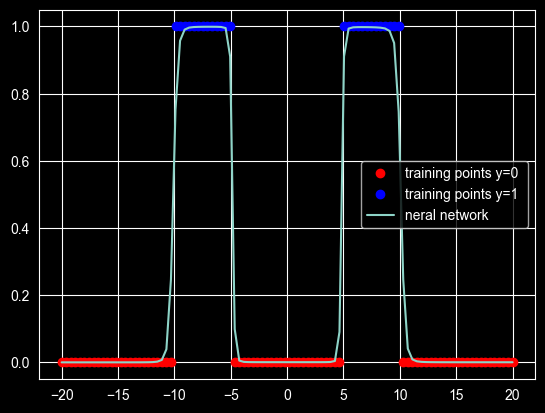

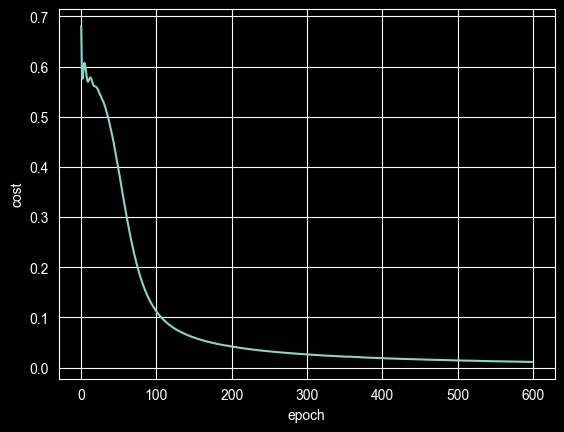

In [10]:
torch.manual_seed(0)
model=Net(1,9,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

In [11]:
# this is for exercises
model= torch.nn.Sequential(
    torch.nn.Linear(1, 6),
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,1),
    torch.nn.Sigmoid()

)

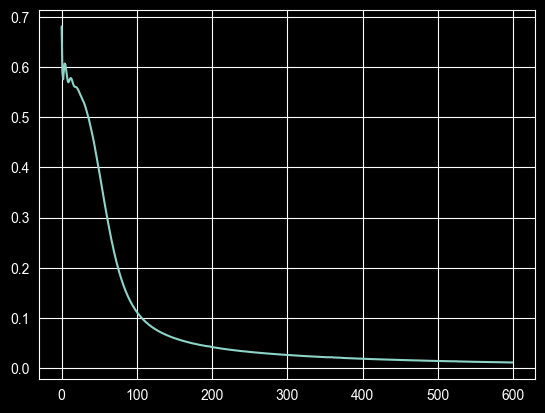

In [12]:
plt.plot(COST)